In [1]:
from IPython.display import HTML 
s="""<h1>2D Navier-Stokes for Flow in a Cavity (NumPy Method)</h1></br><div id="toc"></div>
<script src="https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js" defer></script>""";
h=HTML(s); h

***
# Understand the Problem

## Question

* What is the 2D velocity **and** pressure field for the **2D Navier Stokes Equation** for flow over a cavity?

## Initial Conditions

* The velocity and pressure fields are zero everywhere

## Boundary Conditions

* The u-boundary condition at y=2m is 1m/s (the lid) 

* The other velocity boundary conditions are zero (no slip). 

* The p-boundary condition at y=2m is 0Pa (atmospheric pressure)

* The gradient of pressure at y=0m, x=0m and x=2m is zero (no-slip)

## Governing Equations

* The Navier Stokes Momentum Equation is described as follows:

$$ {\partial u \over \partial t} + u {\partial u \over \partial x} + v {\partial u \over \partial y} = -{1 \over \rho} {{\partial p} \over {\partial x}} + \nu \left ( {\partial^2 u \over \partial x^2}+  {\partial^2 u \over \partial y^2}  \right ) $$

$$ {\partial v \over \partial t} + u {\partial v \over \partial x} + v {\partial v \over \partial y} = -{1 \over \rho} {{\partial p} \over {\partial y}} + \nu \left ( {\partial^2 v \over \partial x^2}+  {\partial^2 v \over \partial y^2}  \right ) $$

* The Poisson Equation to link pressure and velocity is:

$$ \nabla^2 p^{n+1} = \rho {{\nabla \cdot \mathbf{u}^n} \over {\Delta t}}-
   \rho \nabla \cdot (\mathbf{u}^n \cdot \nabla \mathbf{u}^n)+
   \mu \nabla^2 (\nabla \cdot \mathbf{u}^n)
$$

* **Assuming viscosity is small**, the Poisson Equation to link pressure and velocity is as follows (NOTE: not sure how the 2nd term on the RHS translates):

$$ {{\partial^2 p} \over {\partial x^2}} + {{\partial^2 p} \over {\partial y^2}} =
{\rho \over \Delta t} \left( {{\partial u} \over {\partial x}} + {{\partial v} \over {\partial y}} \right)
- \rho \left[ \left( {{\partial u} \over {\partial x}} \right)^2 + 
2 {{\partial u} \over {\partial y}} {{\partial v} \over {\partial x}} +
\left( {{\partial v} \over {\partial y}} \right)^2 \right] $$

(this equation applies in the discrete domain)

***

# Formulate the Problem

## Input Data:

The Poisson Equation has **no temporal component**, so we use a number of iterations `niter`

The Navier Stokes Momentum Equation **does have a temporal component**, so we use `nt`

* `niter` = 51 (maximum number of iterations - for Poisson Equation)
* `nt` = 51 (number of temporal points)
* `nx` = 21 (number of x spatial points)
* `ny` = 21 (number of y spatial points)
* `tmax` = 0.5
* `xmax` = 2
* `ymax` = 2
* `nu` = 0.1
* `rho` = 1

## Initial Conditions:

* $\forall (n, x, y) \quad n = 0 \rightarrow u = 0 \land v = 0 \land p = 0$

## Velocity Boundary Conditions:

* $\forall (n, x, y) \quad y = 2 \rightarrow u = 1$

* $\forall (n, x, y) \quad x = 0 \lor x = 2 \lor y = 0  \rightarrow u = 0$

* $\forall (n, x, y) \quad x = 0 \lor x = 2 \lor y = 0 \lor y = 2  \rightarrow v = 0$

## Pressure Boundary Conditions:

* $\forall (n, x, y) \quad y = 2 \rightarrow p = 0$

* $\forall (n, x, y) \quad y = 0 \rightarrow {{\partial p} \over {\partial y}} = 0$

* $\forall (n, x, y) \quad x = 0 \lor x = 2 \rightarrow {{\partial p} \over {\partial x}} = 0$

## Output Data:

* $\forall (n,x,y) \quad \ p = ? \land u = ? \land v = ?$

***

# Design Algorithm to Solve Problem

## Space-time discretisation:

* i $\rightarrow$ index of grid in x
* j $\rightarrow$ index of grid in y
* n $\rightarrow$ index of time
* m $\rightarrow$ index of iterations

## Numerical schemes for each Momentum Equation

* For the **one** first derivative of velocity in time: 1st order FD in time
* For the **two** first derivatives of velocity in space: 1st order BD in space
* For the **one** first derivative of pressure in space: 2nd order CD in space
* For the **two** second derivatives of velocity in space: 2nd order CD in space

## Numerical schemes for the Poisson Equation

* For the **two** second derivatives of pressure in space: 2nd order CD in space
* The the **four** first derivatives of velocity in space: 2nd order CD in space

## Discrete equation for u-Momentum Equation

$$ {{u_{i,j}^{n+1} - u_{i,j}^n} \over {\Delta t}} + 
   u_{i,j}^n {{u_{i,j}^n - u_{i-1,j}^n} \over \Delta x} + 
   v_{i,j}^n {{u_{i,j}^n - u_{i,j-1}^n} \over \Delta y} = \\
   -{1 \over \rho} {{p_{i+1,j}^n - p_{i-1,j}^n} \over {2 \Delta x}} +
   \nu {{u_{i-1,j}^n - 2u_{i,j}^n + u_{i+1,j}^n} \over \Delta x^2} + 
   \nu {{u_{i,j-1}^n - 2u_{i,j}^n + u_{i,j+1}^n} \over \Delta y^2}
$$

## Transpose

Assume $ \Delta x = \Delta y = h$

$$ u_{i,j}^{n+1} = u_{i,j}^n - {{\Delta t} \over h} \left[ u_{i,j}^n(u_{i,j}^n - u_{i-1,j}^n) + v_{i,j}^n(u_{i,j}^n - u_{i,j-1}^n)\right] - \\
{{\Delta t} \over {2 \rho h}} (p_{i+1,j}^n - p_{i-1,j}^n) + {{\Delta t \nu} \over {h^2}}
(u_{i-1,j}^n + u_{i+1,j}^n + u_{i,j-1}^n + u_{i,j+1}^n - 4 u_{i,j}^n )
$$

## Discrete equation for v-Momentum Equation

$$ {{v_{i,j}^{n+1} - v_{i,j}^n} \over {\Delta t}} + 
   u_{i,j}^n {{v_{i,j}^n - v_{i-1,j}^n} \over \Delta x} + 
   v_{i,j}^n {{v_{i,j}^n - v_{i,j-1}^n} \over \Delta y} = \\
   -{1 \over \rho} {{p_{i,j+1}^n - p_{i,j-1}^n} \over {2 \Delta y}} +
   \nu {{v_{i-1,j}^n - 2v_{i,j}^n + v_{i+1,j}^n} \over \Delta x^2} + 
   \nu {{v_{i,j-1}^n - 2v_{i,j}^n + v_{i,j+1}^n} \over \Delta y^2}
$$

## Transpose

Assume $ \Delta x = \Delta y = h$

$$ v_{i,j}^{n+1} = v_{i,j}^n - {{\Delta t} \over h} \left[ u_{i,j}^n(v_{i,j}^n - v_{i-1,j}^n) + v_{i,j}^n(v_{i,j}^n - v_{i,j-1}^n)\right] - \\
{{\Delta t} \over {2 \rho h}} (p_{i,j+1}^n - p_{i,j-1}^n) + {{\Delta t \nu} \over {h^2}}
(v_{i-1,j}^n + v_{i+1,j}^n + v_{i,j-1}^n + v_{i,j+1}^n - 4 v_{i,j}^n )
$$

## Discrete equation for Poisson Equation must be Divergence Free

Since no terms have a differential temporal component - bring source term to other side and equate to forward differencing (as we did for Laplace Equation). Then take steady state after a certain number of iterations.

$$ {{\partial p} \over {\partial t}} = {\partial^2 p \over \partial x^2} + {\partial^2 p \over \partial y^2} - 
\left[ {\rho \over \Delta t} \left( {{\partial u} \over {\partial x}} + {{\partial v} \over {\partial y}} \right)
- \rho \left[ \left( {{\partial u} \over {\partial x}} \right)^2 + 
2 {{\partial u} \over {\partial y}} {{\partial v} \over {\partial x}} +
\left( {{\partial v} \over {\partial y}} \right)^2 \right] \right] $$

$$ {{\partial p} \over {\partial t}} = {\partial^2 p \over \partial x^2} + {\partial^2 p \over \partial y^2} - 
b $$

$$ {{p_{i,j}^{m+1}-p_{i,j}^m} \over {\Delta \tau}} = {{p_{i+1,j}^m -2p_{i,j}^m + p_{i-1,j}^m} \over \Delta x^2} + {{p_{i,j+1}^m -2p_{i,j}^m + p_{i,j-1}^m} \over \Delta y^2} - b_{i,j}^m $$

Assume that $ \Delta x = \Delta y = h $

$$ {{p_{i,j}^{m+1}-p_{i,j}^m} \over {\Delta \tau}} = {{p_{i+1,j}^m -2p_{i,j}^m + p_{i-1,j}^m} \over h^2} + {{p_{i,j+1}^m -2p_{i,j}^m + p_{i,j-1}^m} \over h^2} - b_{i,j}^m $$


$$ p_{i,j}^{m+1} = p_{i,j}^m + {{\Delta \tau} \over {h^2}} \left( 
p_{i+1,j}^m + p_{i-1,j}^m + p_{i,j+1}^m + p_{i,j-1}^m - 4p_{i,j}^m \right) - b_{i,j}^m \Delta \tau $$

For the fastest convergence $ r = {{\Delta \tau} \over {h^2}} = {1 \over 4} $ and $ \Delta \tau = {{h^2} \over 4} $

Hence:

$$ p_{i,j}^{m+1} = {1 \over 4} \left( p_{i+1,j}^m + p_{i-1,j}^m + p_{i,j+1}^m + p_{i,j-1}^m - b_{i,j}^m h^2 \right) $$

So now we need to define $ b_{i,j}^m $

$$
b = {\rho \over \Delta t} \left( {{\partial u} \over {\partial x}} + {{\partial v} \over {\partial y}} \right)
- \rho \left[ \left( {{\partial u} \over {\partial x}} \right)^2 + 
2 {{\partial u} \over {\partial y}} {{\partial v} \over {\partial x}} +
\left( {{\partial v} \over {\partial y}} \right)^2 \right] 
$$



$$ b_{i,j}^{m} = 
{\rho \over \Delta t} \left( {{u_{i+1,j}^n - u_{i-1,j}^n} \over {2 \Delta x}} + {{v_{i,j+1}^n - v_{i,j-1}^n} \over {2 \Delta y}} \right) +
\rho \left[ \left( {{u_{i+1,j}^n - u_{i-1,j}^n} \over {2 \Delta x}} \right)^2 + 2 \left( {{u_{i,j+1}^n - u_{i,j-1}^n} \over {2 \Delta y}} {{v_{i+1,j}^n - v_{i-1,j}^n} \over {2 \Delta x}}\right) +
\left( {{v_{i,j+1}^n - v_{i,j-1}^n} \over {2 \Delta y}} \right)^2 \right] $$

Also assume that $ \Delta x = \Delta y = h $


$$ b_{i,j}^{m} = 
{\rho \over {2 h \Delta t}} ( {{u_{i+1,j}^n - u_{i-1,j}^n}} + {{v_{i,j+1}^n - v_{i,j-1}^n}} ) +
{\rho \over {4h^2}} \left[ (u_{i+1,j}^n - u_{i-1,j}^n)^2 + 4h ( u_{i,j+1}^n - u_{i,j-1}^n) (v_{i+1,j}^n - v_{i-1,j}^n) + (v_{i,j+1}^n - v_{i,j-1}^n)^2 \right] $$

## Pseudo-code

    # Inputs:
    
    niter = 51 
    nx =  21
    xmax = 2
    ymax = 2
    nt = 51
    tmax = 0.5
    r = 0.25
    
    # Calculated increments:
    dt = tmax/(nt-1)

    # Increments in x and y are the same - h, dy & dx should be rational numbers:
    h = dy = dx = xmax/(nx-1)

    # Compute ny from dy and ymax - ny should be an integer
    ny = int(ymax/dy) + 1

    # Initial Conditions:
        p[:,:,0] = 0
        pm[:,:,0] = 0
        u[:,:,0] = 0
        v[:,:,0] = 0

    # Velocity Boundary Conditions:
        u[:,ny-1,:] = 1
        u[0,:,:] = u[nx-1,:,:] = u[:,0,:] = 0
        v[0,:,:] = v[nx-1,:,:] = v[:,0,:] = v[:,ny-1,:] = 0

    # Pressure Boundary Conditions:
        p[:,ny-1,:] = 0
        pm[:,ny-1,:] = 0

    # Values for correction at boundaries:
    for i between 0 and nx-1
        ipos[i] = i + 1
        ineg[i] = i - 1

    for j between 0 and ny-1
        jneg[j] = j - 1

    # Set Reflection at i = 0, nx-1 and j = 0: 
        ineg[0] = 1          # i.e. index -1 = 1
        ipos[nx-1] = nx-2    # i.e. index nx = nx-2
        jneg[0] = 1          # i.e. index -1 = 1
       
    # Numerical Computation
    
    for n between 0 and nt-1
      
        for i between 1 and nx-2
            for j between 1 and ny-2

                b[i,j] = {rho / (2 * h * dt)} * { u[i+1,j] - u[i-1,j] + v[i,j+1] - v[i,j-1] }
                + {rho / (4*h^2)} * { (u[i+1,j] - u[i-1,j])^2 + 
                            4*h*(u[i,j+1] - u[i,j-1])*(v[i+1,j] - v[i-1,j]) + 
                                (v[i,j+1] - v[i,j-1])^2 }   
            end
         end 
   
        for m between 0 and niter-1

            pm = p.copy()

            for i between 0 and nx-1
                for j between 0 and ny-2

                    p[i,j] = 0.25*( pm[ipos[i],j]+pm[ineg[i],j]+pm[i,j+1]+pm[i,jneg[j]] - b[i,j]*h**2 )

                end
            end
         end 
            
        for i between 1 and nx-2
            for j between 1 and ny-2

                un = u.copy()
                vn = v.copy()

                u[i,j] = un[i,j] - (dt / h) * [ un[i,j] * ( un[i,j] - un[i-1,j] ) + 
                                                   vn[i,j,n] * ( un[i,j] - un[i,j-1] ) ] - 
                                                   {dt / (2 * rho * h)} * ( p[ipos[i],j] - p[ineg[i],j] ) + 
                   {(dt * nu) / (h^2)} * ( un[i-1,j] + un[i+1,j] + un[i,j-1] + un[i,j+1] - 4 * un[i,j] )  

                v[i,j] = vn[i,j] - (dt / h) * [ un[i,j] * ( vn[i,j] - vn[i-1,j] ) + 
                                                   vn[i,j] * ( vn[i,j] - vn[i,j-1] ) ] - 
                                                   {dt / (2 * rho * h)} * ( p[i,j+1] - p[i,jneg[j]] ) + 
                   {(dt * nu) / (h^2)} * ( vn[i-1,j] + vn[i+1,j] + vn[i,j-1] + vn[i,j+1] - 4 * vn[i,j] )       

             end
         end
       
***

# Implement algorithm in Python

I initially tried this with the laplace equation from the previous case


## Simplified Poisson Equation (Actually Laplace's Equation)

In [34]:
def poisson_initialisation(niter, r, nx_or_ny, tmax, xmax_or_ymax):
    """
    Returns the velocity field and distance for 2D linear convection
    """
    # Increments:
    nx = ny = nx_or_ny
    xmax = ymax = xmax_or_ymax
    dx = xmax/(nx-1)
    dy = ymax/(ny-1)
    nt = int((tmax / (r*(dx)**2))+1)
    dt = tmax/(nt-1)

    # Initialise data structures:
    import numpy as np
    
    # Initial conditions
    p = np.zeros((nx,ny))
    u = np.zeros((nx,ny))
    v = np.zeros((nx,ny))
    
    # x and y range
    x = np.zeros(nx)
    y = np.zeros(ny)

    # X Loop
    x[0:nx] = [i*dx for i in range(nx)]

    # Y Loop
    y[0:ny] = [j*dy for j in range(ny)]

    # Pressure Boundary Conditions:
    p[:, ny-1] = 1
     
    # Velocity Boundary Conditions:
        
    u[:, ny-1] = 1
    u[0, :] = 0
    u[nx-1, :] = 0
    u[:, 0] = 0
    v[0, :] = 0
    v[nx-1, :] = 0
    v[:, 0] = 0
    v[:, ny-1] = 0
    
    return p, x, y, u, v, nx, ny, nt, dx, dy, dt, niter, r

In [157]:
def poisson_equation_numerical(rho):

    """
    Returns the velocity field and distance for 2D linear convection
    """
    
    (p, x, y, u, v, nx, ny, nt, 
    dx, dy, dt, niter, r) = poisson_initialisation(50, 0.25, 51, 0.5, 2.0)
    
    import numpy as np
    ipos = np.zeros(nx, dtype=np.int)
    ineg = np.zeros(nx, dtype=np.int)
    jneg = np.zeros(ny, dtype=np.int)
    
    # Intermediate copies:
    pm = np.zeros((nx, ny))
    bm = np.zeros((nx, ny)) # bm needs to be exactly zero at the boundaries

    # Values for correction at boundaries: List Comprehensions
    ipos[0:nx] = [i + 1 for i in range(nx)]
    ineg[0:nx] = [i - 1 for i in range(nx)]
    jneg[0:ny] = [j - 1 for j in range(ny)]

    # Set Reflection at i = 0, nx-1 and j = 0: 
    ineg[0] = 1          # i.e. index -1 = 1
    ipos[nx-1] = nx-2    # i.e. index nx = nx-2
    jneg[0] = 1          # i.e. index -1 = 1

    h = dx
    
    ## NumPy Slicing is more efficient than loops ###
    
    # First points for b. We know the velocity at i=0, j=0, i=nx-1 and j=ny-1. b is zero at the boundaries.
    i=1
    j=1    
    bm[i:nx-1, j:ny-1] = ( (rho / (2.0 * h * dt)) * ( u[i+1:nx, j:ny-1] - u[i-1:nx-2, j:ny-1] 
                                                    + v[i:nx-1, j+1:ny] - v[i:nx-1, j-1:ny-2] ) +
        (rho / (4.0*h**2)) * ( (u[i+1:nx, j:ny-1] - u[i-1:nx-2, j:ny-1])**2.0 + 
                         4.0*h*(u[i:nx-1, j+1:ny] - u[i:nx-1, j-1:ny-2])*
                               (v[i+1:nx, j:ny-1] - v[i-1:nx-2, j:ny-1]) + 
                               (v[i:nx-1, j+1:ny] - v[i:nx-1, j-1:ny-2])**2.0 ) )
    
    # Basically items start through end-1 can be done like this:
    # a[start:end] 
    # a[start:] 
    # a[:end] 
    # a[:]
    
    # For a[start:end] THE INDEX DENOTES THE POSITION OF THE SLICE - NOT THE ELEMENT:
    # +---+---+---+---+------+
    # | H | e | l | p | A    |
    # +---+---+---+---+------+
    # 0   1   2   3   nx-1   nx
    #-5  -4  -3  -2  -1
    
    # First points for p. We don't know the pressure at i=0, j=0 and i=nx-1. We DO know the pressure at j=ny-1
    i=0
    j=0
    for m in range(niter):
        pm = np.copy(p)        
        p[i:nx, j:ny-1] = 0.25*( pm[ipos[i:nx], j:ny-1] + pm[ineg[i:nx], j:ny-1] 
                               + pm[i:nx, j+1:ny]       + pm[i:nx, jneg[j:ny-1]]
                               - bm[i:nx, j:ny-1]*h**2 )
    
    return p, x, y, bm

In [153]:
(p1, x1, y1, u1, v1, nx, ny, nt, 
    dx, dy, dt, niter, r) = poisson_initialisation(50, 0.25, 51, 0.5, 2.0)

In [154]:
p2, x2, y2, bm2 = poisson_equation_numerical(1)

In [155]:
def plot_3D(p,x,y,title,label):
    """
    Plots the 2D velocity field
    """

    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure(figsize=(11,7),dpi=100)
    ax=fig.gca(projection='3d')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel(label)
    ax.set_xlim(0,2)
    ax.set_ylim(0,1)
    ax.view_init(30,225)
    Y,X=np.meshgrid(y,x) #note meshgrid uses y,x not x,y!!!
    surf=ax.plot_surface(X,Y,p[:,:], rstride=1, cstride=1)
    plt.title(title)
    plt.show()

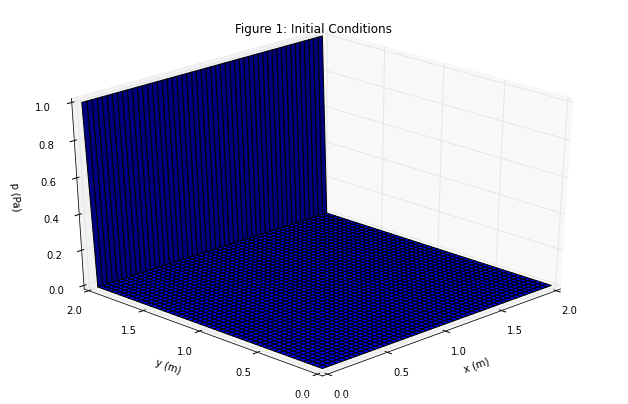

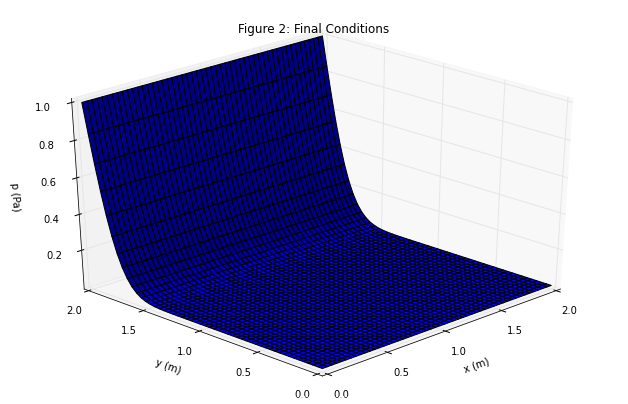

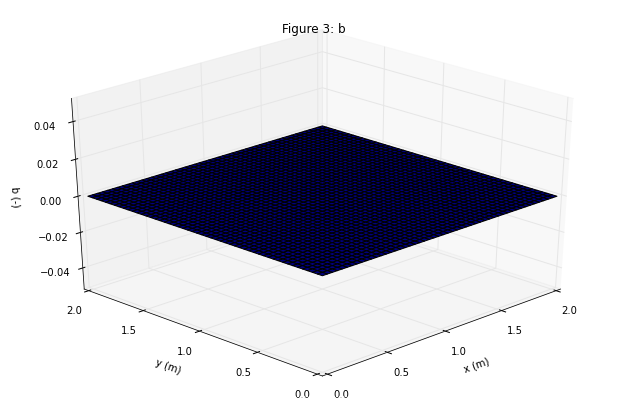

In [156]:
plot_3D(p1,x1,y1,'Figure 1: Initial Conditions','p (Pa)')
plot_3D(p2,x2,y2,'Figure 2: Final Conditions','p (Pa)')
plot_3D(bm2,x2,y2, 'Figure 3: b', 'b (-)')

## Simplified Momentum Equation (Actually Burgers Equation)

In [148]:
def burgers_initialisation(niter, r, nx_or_ny, tmax, xmax_or_ymax):
    """
    Returns the velocity field and distance for 2D linear convection
    """
    # Increments:
    nx = ny = nx_or_ny
    xmax = ymax = xmax_or_ymax
    dx = xmax/(nx-1)
    dy = ymax/(ny-1)
    nt = int((tmax / (r*(dx)**2))+1)
    dt = tmax/(nt-1)
    
    # Initialise data structures:
    import numpy as np
    p = np.zeros((nx,ny))
    u = np.zeros((nx,ny))
    v = np.zeros((nx,ny))
    
    # x and y range
    x = np.zeros(nx)
    y = np.zeros(ny)

    # X Loop
    x[0:nx] = [i*dx for i in range(nx)]

    # Y Loop
    y[0:ny] = [j*dy for j in range(ny)]

    # Boundary conditions
    u[0,:] = u[nx-1,:] = u[:,0] = u[:,ny-1] = 1
    v[0,:] = v[nx-1,:] = v[:,0] = v[:,ny-1] = 1

    # Initial conditions
    u[:,:] = v[:,:] = 1
    u[(nx-1)/4:(nx-1)/2,(ny-1)/4:(ny-1)/2] = 2
    v[(nx-1)/4:(nx-1)/2,(ny-1)/4:(ny-1)/2] = 2
        
    # Boundary conditions
    p[0,:] = p[nx-1,:] = p[:,0] = p[:,ny-1] = 1
    
    # Initial conditions
    p[:,:] = 1
    #p[(nx-1)/4:(nx-1)/2,(ny-1)/4:(ny-1)/2] = 2   
    
    return p, x, y, u, v, nx, ny, nt, dx, dy, dt, niter, r

In [146]:
def burgers_equation(rho, nu):

    (p, x, y, u, v, nx, ny, nt, 
    dx, dy, dt, niter, r) = burgers_initialisation(50, 0.25, 51, 0.5, 2.0)
    
    # Increments
    h = dx
    
    import numpy as np
    
    # Intermediate copies:
    un = np.zeros((nx, ny))
    vn = np.zeros((nx, ny))
    
    # Initialise values:
    ipos = np.zeros(nx, dtype=np.int)
    ineg = np.zeros(nx, dtype=np.int)
    jneg = np.zeros(ny, dtype=np.int)
    
    # Values for correction at boundaries: List Comprehensions
    ipos[0:nx] = [i + 1 for i in range(nx)]
    ineg[0:nx] = [i - 1 for i in range(nx)]
    jneg[0:ny] = [j - 1 for j in range(ny)]

    # Set Reflection at i = 0, nx-1 and j = 0: 
    ineg[0] = 1          # i.e. index -1 = 1
    ipos[nx-1] = nx-2    # i.e. index nx = nx-2
    jneg[0] = 1          # i.e. index -1 = 1
    
    i=1
    j=1  
    
    # Loop
    for n in range(nt):    
        
        # We know the velocity at i=0, j=0, i=nx-1 and j=ny-1.
        un = np.copy(u)
        vn = np.copy(v)
        
        u[i:nx-1, j:ny-1] = ( un[i:nx-1, j:ny-1] - 
                 (dt / h) * ( un[i:nx-1, j:ny-1] * ( un[i:nx-1, j:ny-1] - un[i-1:nx-2, j:ny-1] ) + 
                              vn[i:nx-1, j:ny-1] * ( un[i:nx-1, j:ny-1] - un[i:nx-1, j-1:ny-2] ) ) - 
                            (dt / (2 * rho * h)) * ( p[ipos[i:nx-1], j:ny-1] - p[ineg[i:nx-1], j:ny-1] ) + 
                            ((dt * nu) / (h**2)) * ( un[i-1:nx-2, j:ny-1] + un[i+1:nx, j:ny-1] + 
                                                     un[i:nx-1, j-1:ny-2] + un[i:nx-1, j+1:ny] -
                                                 4 * un[i:nx-1, j:ny-1] ) ) 

        v[i:nx-1, j:ny-1] = ( vn[i:nx-1, j:ny-1] - 
                 (dt / h) * ( un[i:nx-1, j:ny-1] * ( vn[i:nx-1, j:ny-1] - vn[i-1:nx-2, j:ny-1] ) + 
                              vn[i:nx-1, j:ny-1] * ( vn[i:nx-1, j:ny-1] - vn[i:nx-1, j-1:ny-2] ) ) - 
                            (dt / (2 * rho * h)) * ( p[i:nx-1, j+1:ny] - p[i:nx-1, jneg[j:ny-1]] ) + 
                            ((dt * nu) / (h**2)) * ( vn[i-1:nx-2, j:ny-1] + vn[i+1:nx, j:ny-1] + 
                                                     vn[i:nx-1, j-1:ny-2] + vn[i:nx-1, j+1:ny] -
                                                 4 * vn[i:nx-1, j:ny-1] ) )       
    
    return u, v, p, x, y 

In [149]:
(p10, x10, y10, u10, v10, nx, ny, nt, 
    dx, dy, dt, niter, r) = burgers_initialisation(50, 0.25, 51, 0.5, 2.0)

In [150]:
u20, v20, p20, x20, y20 = burgers_equation(1, 0.1)

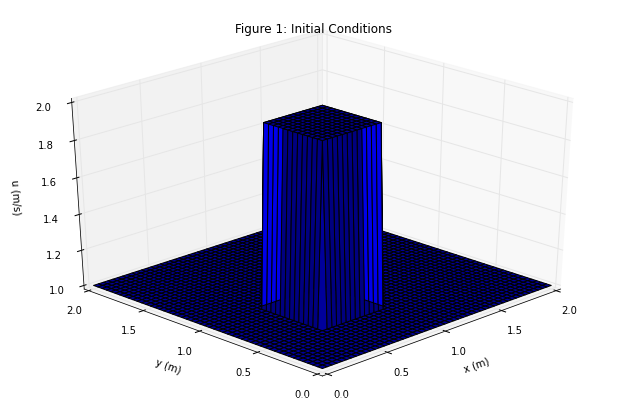

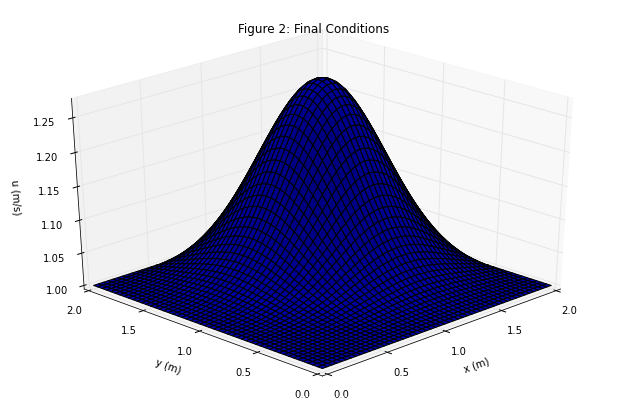

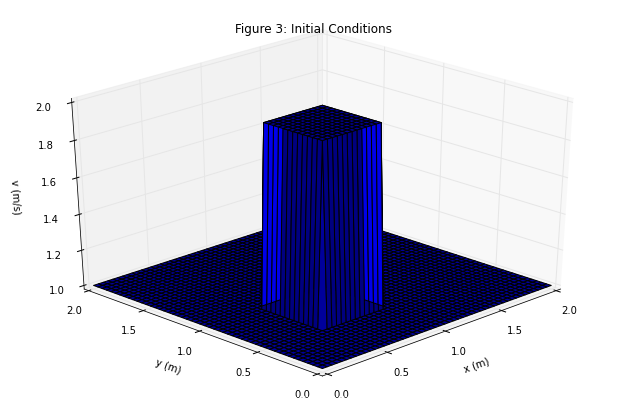

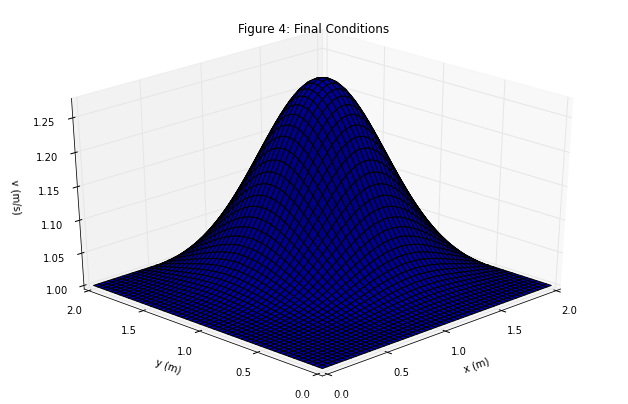

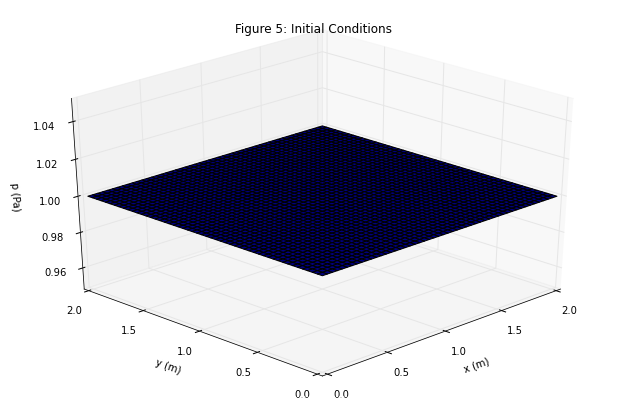

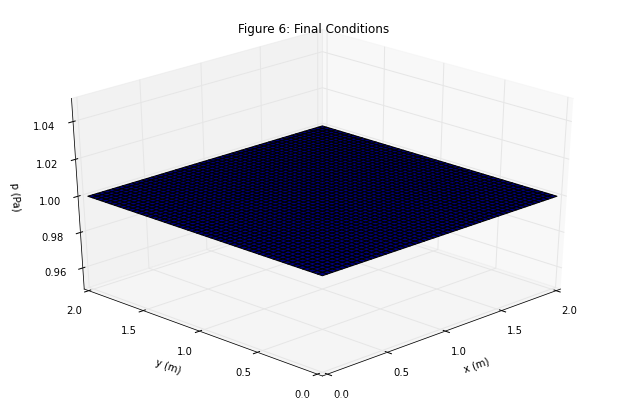

In [151]:
plot_3D(u10,x10,y10,'Figure 1: Initial Conditions','u (m/s)')
plot_3D(u20,x20,y20,'Figure 2: Final Conditions','u (m/s)')
plot_3D(v10,x10,y10,'Figure 3: Initial Conditions','v (m/s)')
plot_3D(v20,x20,y20,'Figure 4: Final Conditions','v (m/s)')
plot_3D(p10,x10,y10,'Figure 5: Initial Conditions','p (Pa)')
plot_3D(p20,x20,y20,'Figure 6: Final Conditions','p (Pa)')

## Navier Stokes Equations - nx and ny notation

In [3]:
def navier_stokes_initialisation(niter, r, nx_or_ny, tmax, xmax_or_ymax):
    """
    Returns the velocity field and distance for 2D linear convection
    """
    # Increments:
    nx = ny = nx_or_ny
    xmax = ymax = xmax_or_ymax
    dx = xmax/(nx-1)
    dy = ymax/(ny-1)
    nt = int((tmax / (r*(dx)**2))+1)
    dt = tmax/(nt-1)
    
    # Initialise data structures:
    import numpy as np
    p = np.zeros((nx,ny))
    u = np.zeros((nx,ny))
    v = np.zeros((nx,ny))
    
    # linspace is SIMPLER than list comprehensions:
    x = np.linspace(0.0,2.0,nx)
    y = np.linspace(0.0,2.0,ny)
    
    # Pressure Boundary Conditions:
    p[:, ny-1] = 0.0
    
    # Velocity Boundary Conditions:
    u[:,ny-1] = 1.0
        
    return p, x, y, u, v, nx, ny, nt, dx, dy, dt, niter, r

In [12]:
def navier_stokes_equation(rho, nu):
                  
    (p, x, y, u, v, nx, ny, nt, 
    dx, dy, dt, niter, r) = navier_stokes_initialisation(50, 0.5, 51, 0.5, 2.0)
    
    # Increments
    h = dx
    
    import numpy as np
    
    # Intermediate copies:
    un = np.zeros((nx, ny))
    vn = np.zeros((nx, ny))
    pm = np.zeros((nx, ny))
    bm = np.zeros((nx, ny)) # bm needs to be exactly zero at the boundaries
        
    # Loop - use decimal points for all floating point numbers
    for n in range(nt):    
        
        # First points for b. We know the velocity at i=0, j=0, i=nx-1 and j=ny-1. b is zero at the boundaries.
        i=1
        j=1    
        bm[i:nx-1, j:ny-1] = ( (rho / (2.0 * h * dt)) * ( u[i+1:nx, j:ny-1] - u[i-1:nx-2, j:ny-1] 
                                                        + v[i:nx-1, j+1:ny] - v[i:nx-1, j-1:ny-2] ) +
            (rho / (4.0*h**2)) * ( (u[i+1:nx, j:ny-1] - u[i-1:nx-2, j:ny-1])**2.0 + 
                             4.0*h*(u[i:nx-1, j+1:ny] - u[i:nx-1, j-1:ny-2])*
                                   (v[i+1:nx, j:ny-1] - v[i-1:nx-2, j:ny-1]) + 
                                   (v[i:nx-1, j+1:ny] - v[i:nx-1, j-1:ny-2])**2.0 ) )
        
        # First points for p. We don't know the pressure at i=0, j=0 and i=nx-1. We DO know the pressure at j=ny-1
        for m in range(niter):
            pm = np.copy(p)
            p[i:nx-1, j:ny-1] = 0.25*( pm[i+1:nx, j:ny-1] + pm[i-1:nx-2, j:ny-1] 
                                     + pm[i:nx-1, j+1:ny] + pm[i:nx-1, j-1:ny-2]
                                     - bm[i:nx-1, j:ny-1]*h**2.0 )
            
            # Set zero gradient boundary conditions -
            # Assignment within the loop is SIMPLER than separate np arrays for reflection 
            p[0, :] = p[1, :]
            p[:, 0] = p[:, 1]
            p[nx-1, :] = p[nx-2, :]
        
        # First points for u and v. We know the velocity at i=0, j=0, i=nx-1 and j=ny-1.
        # We are simply using the value of pressure here
        un = np.copy(u)
        vn = np.copy(v)
              
        u[i:nx-1, j:ny-1] = ( un[i:nx-1, j:ny-1] - 
                 (dt / h) * ( un[i:nx-1, j:ny-1] * ( un[i:nx-1, j:ny-1] - un[i-1:nx-2, j:ny-1] ) + 
                              vn[i:nx-1, j:ny-1] * ( un[i:nx-1, j:ny-1] - un[i:nx-1, j-1:ny-2] ) ) - 
                            (dt / (2.0 * rho * h)) * ( p[i+1:nx, j:ny-1] - p[i-1:nx-2, j:ny-1] ) + 
                            ((dt * nu) / (h**2.0)) * ( un[i-1:nx-2, j:ny-1] + un[i+1:nx, j:ny-1] + 
                                                     un[i:nx-1, j-1:ny-2] + un[i:nx-1, j+1:ny] -
                                               4.0 * un[i:nx-1, j:ny-1] ) ) 

        v[i:nx-1, j:ny-1] = ( vn[i:nx-1, j:ny-1] - 
                 (dt / h) * ( un[i:nx-1, j:ny-1] * ( vn[i:nx-1, j:ny-1] - vn[i-1:nx-2, j:ny-1] ) + 
                              vn[i:nx-1, j:ny-1] * ( vn[i:nx-1, j:ny-1] - vn[i:nx-1, j-1:ny-2] ) ) - 
                            (dt / (2.0 * rho * h)) * ( p[i:nx-1, j+1:ny] - p[i:nx-1, j-1:ny-2] ) + 
                            ((dt * nu) / (h**2.0)) * ( vn[i-1:nx-2, j:ny-1] + vn[i+1:nx, j:ny-1] + 
                                                     vn[i:nx-1, j-1:ny-2] + vn[i:nx-1, j+1:ny] -
                                               4.0 * vn[i:nx-1, j:ny-1] ) )          
    
    return u, v, p, x, y, bm 

In [13]:
(p30, x30, y30, u30, v30, nx, ny, nt, 
    dx, dy, dt, niter, r) = navier_stokes_initialisation(50, 0.5, 51, 0.5, 2.0)      

In [14]:
u40, v40, p40, x40, y40, bm40 = navier_stokes_equation(1.0, 0.1)

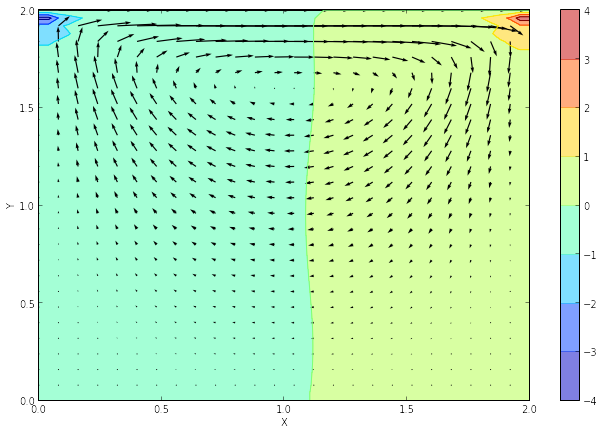

In [15]:
fig = plt.figure(figsize=(11,7), dpi=100)
Y,X=np.meshgrid(y40,x40) #note meshgrid uses y,x not x,y!!!
plt.contourf(X,Y,p40[:,:],alpha=0.5)    ###plotting the pressure field as a contour
plt.colorbar()
plt.contour(X,Y,p40[:,:])               ###plotting the pressure field outlines
plt.quiver(X[::2,::2],Y[::2,::2],u40[::2,::2],v40[::2,::2]) ##plotting velocity
plt.xlabel('X')
plt.ylabel('Y')

## Navier Stokes Equations - slice notation

In [1]:
def navier_stokes(rho, nu, niter, r, nx, tmax, xmax):
                  
    (p, x, y, u, v, nx, ny, nt, 
    dx, dy, dt, niter, r) = navier_stokes_initialisation(niter, r, nx, tmax, xmax)
    
    # Increments
    h = dx
    
    import numpy as np
    
    # Intermediate copies:
    un = np.zeros((nx, ny))
    vn = np.zeros((nx, ny))
    pm = np.zeros((nx, ny))
    bm = np.zeros((nx, ny)) # bm needs to be exactly zero at the boundaries
        
    # Loop - use decimal points for all floating point numbers
    for n in range(nt):    
        
        # We know the velocity at i=0, j=0, i=nx-1 and j=ny-1. b is zero at the boundaries.  
        bm[1:-1, 1:-1] = ( (rho / (2.0 * h * dt)) * ( u[2:, 1:-1] - u[0:-2, 1:-1] 
                                                    + v[1:-1, 2:] - v[1:-1, 0:-2] ) +
            (rho / (4.0*h**2)) * ( (u[2:, 1:-1] - u[0:-2, 1:-1])**2.0 + 
                             4.0*h*(u[1:-1, 2:] - u[1:-1, 0:-2])*(v[2:, 1:-1] - v[0:-2, 1:-1]) + 
                                   (v[1:-1, 2:] - v[1:-1, 0:-2])**2.0 ) )
        
        # First points for p. We don't know the pressure at i=0, j=0 and i=nx-1. We DO know the pressure at j=ny-1
        for m in range(niter):
            pm = np.copy(p)
            p[1:-1, 1:-1] = 0.25*( pm[2:, 1:-1] + pm[0:-2, 1:-1] + pm[1:-1, 2:] + pm[1:-1, 0:-2]
                                 - bm[1:-1, 1:-1]*h**2.0 )
            
            # Set zero gradient boundary conditions:
            p[0, :] = p[1, :]
            p[:, 0] = p[:, 1]
            p[-1, :] = p[-2, :]
        
        # First points for u and v. We know the velocity at i=0, j=0, i=nx-1 and j=ny-1.
        # We are simply using the value of pressure here
        un = np.copy(u)
        vn = np.copy(v)
              
        u[1:-1, 1:-1] = ( un[1:-1, 1:-1] - 
                 (dt / h) * ( un[1:-1, 1:-1] * ( un[1:-1, 1:-1] - un[0:-2, 1:-1] ) + 
                              vn[1:-1, 1:-1] * ( un[1:-1, 1:-1] - un[1:-1, 0:-2] ) ) - 
        (dt / (2.0 * rho * h)) * ( p[2:, 1:-1] - p[0:-2, 1:-1] ) + 
        (dt * nu / h**2.0) * ( un[0:-2, 1:-1] + un[2:, 1:-1] + un[1:-1, 0:-2] + un[1:-1, 2:] - 
                         4.0 * un[1:-1, 1:-1] ) ) 

        v[1:-1, 1:-1] = ( vn[1:-1, 1:-1] - 
                 (dt / h) * ( un[1:-1, 1:-1] * ( vn[1:-1, 1:-1] - vn[0:-2, 1:-1] ) + 
                              vn[1:-1, 1:-1] * ( vn[1:-1, 1:-1] - vn[1:-1, 0:-2] ) ) - 
        (dt / (2.0 * rho * h)) * ( p[1:-1, 2:] - p[1:-1, 0:-2] ) + 
        (dt * nu / h**2.0) * ( vn[0:-2, 1:-1] + vn[2:, 1:-1] + vn[1:-1, 0:-2] + vn[1:-1, 2:] -
                         4.0 * vn[1:-1, 1:-1] ) )          
    
    return u, v, p, x, y

In [139]:
%timeit navier_stokes(1, 0.1, 50, 0.5, 51, 0.5, 2.0)

1 loops, best of 3: 6.44 s per loop


In [4]:
u00, v00, p00, x00, y00 = navier_stokes(1, 0.1, 50, 0.5, 51, 0.5, 2.0)

In [18]:
def vector_contour(u, v, p, x, y):
    fig = plt.figure(figsize=(11,7), dpi=100)
    Y,X=np.meshgrid(y,x) #note meshgrid uses y,x not x,y!!!
    plt.contourf(X,Y,p[:,:],alpha=0.5)    ###plotting the pressure field as a contour
    plt.colorbar()
    plt.contour(X,Y,p[:,:])               ###plotting the pressure field outlines
    plt.quiver(X[::2,::2],Y[::2,::2],u[::2,::2],v[::2,::2]) ##plotting velocity
    plt.xlabel('X')
    plt.ylabel('Y')

# Results

## 51 spatial intervals tmax = 0.5 seconds

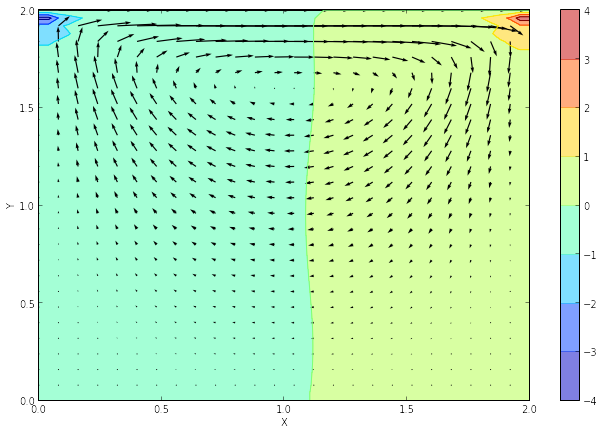

In [19]:
vector_contour(u00, v00, p00, x00, y00)

## 51 spatial intervals tmax = 2 seconds

In [9]:
u11, v11, p11, x11, y11 = navier_stokes(1, 0.1, 50, 0.5, 51, 2.0, 2.0)

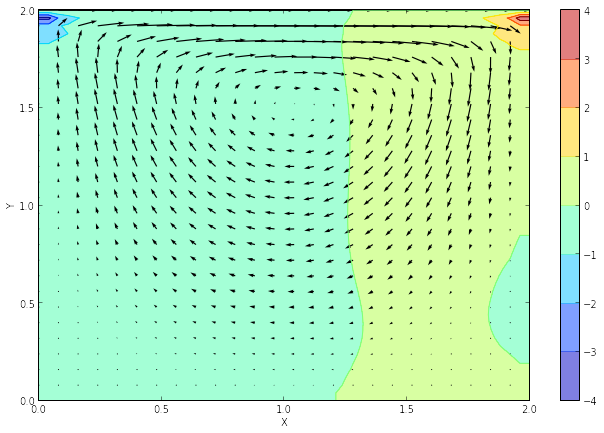

In [172]:
vector_contour(u11, v11, p11, x11, y11)

## 51 spatial intervals tmax = 3 seconds

In [10]:
u22, v22, p22, x22, y22 = navier_stokes(1, 0.1, 50, 0.5, 51, 3.0, 2.0)

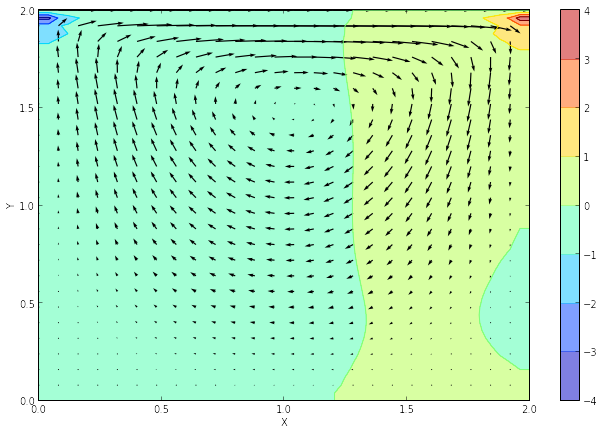

In [170]:
vector_contour(u22, v22, p22, x22, y22)

## How much time needs to pass before the open cavity flow settles down to a steady state?

* It looks from the above that this time will be somewhere around 2-3 seconds 
* Why not measure the velocity profile at the centreline?

In [31]:
u0, v0, p0, x0, y0 = navier_stokes(1, 0.1, 50, 0.5, 51, 0.5, 2.0)
u1, v1, p1, x1, y1 = navier_stokes(1, 0.1, 50, 0.5, 51, 1.0, 2.0)
u2, v2, p2, x2, y2 = navier_stokes(1, 0.1, 50, 0.5, 51, 1.5, 2.0)
u3, v3, p3, x3, y3 = navier_stokes(1, 0.1, 50, 0.5, 51, 2.0, 2.0)
u4, v4, p4, x4, y4 = navier_stokes(1, 0.1, 50, 0.5, 51, 2.5, 2.0)
u5, v5, p5, x5, y5 = navier_stokes(1, 0.1, 50, 0.5, 51, 3.0, 2.0)

In [36]:
def plot_u_vs_y(u0, u1, u2, u3, u4, u5, y0):

   """
   Plots the 1D velocity field
   """

   import matplotlib.pyplot as plt
   import matplotlib.cm as cm
   u_vel = np.zeros((51,6))
   u_vel[:, 0] = u0[25, :]
   u_vel[:, 1] = u1[25, :]
   u_vel[:, 2] = u2[25, :]
   u_vel[:, 3] = u3[25, :]
   u_vel[:, 4] = u4[25, :]
   u_vel[:, 5] = u5[25, :] 
    
   plt.figure()
   ax=plt.subplot(111)
   colour=iter(cm.rainbow(np.linspace(0, 1, 6)))
   for n in range(6):
      c=next(colour)
      ax.plot(y0,u_vel[:, n],linestyle='-',c=c, label='t= '+str(0.5*n+0.5)+ ' sec')
   box=ax.get_position()
   ax.set_position([box.x0, box.y0, box.width*2,box.height*2])
   ax.legend( bbox_to_anchor=(1.0,1.0), loc=2)
   plt.xlabel('y (m)')
   plt.ylabel('u (m/s)')
   #plt.ylim([0,8.0])
   #plt.xlim([0,2.0*PI])
   #plt.title(TITLE)
   plt.show()    

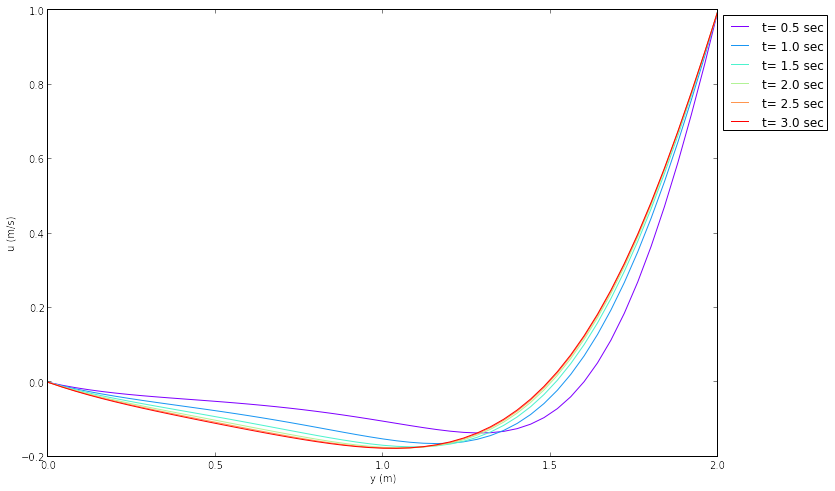

In [37]:
plot_u_vs_y(u0, u1, u2, u3, u4, u5, y0)

* So it looks like the u velocity settles down after about 2 seconds

## What Happens at Re = 200 with a smooth contour plot?

In [26]:
u33, v33, p33, x33, y33 = navier_stokes(1.0, 0.01, 50, 0.5, 41, 5.0, 2.0)

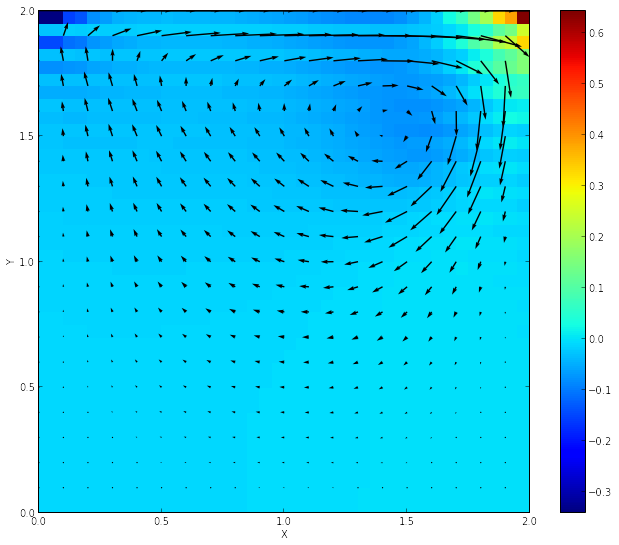

In [31]:
def vector_contour_2(u, v, p, x, y):
    fig = plt.figure(figsize=(11,9), dpi=100)
    Y,X=np.meshgrid(y,x) #note meshgrid uses y,x not x,y!!!
    plt.pcolor(X,Y,p)
    plt.colorbar()
    #plt.contourf(X,Y,p[:,:],alpha=0.5)    ###plotting the pressure field as a contour
   # plt.colorbar()
   # plt.contour(X,Y,p[:,:])               ###plotting the pressure field outlines
    plt.quiver(X[::2,::2],Y[::2,::2],u[::2,::2],v[::2,::2]) ##plotting velocity
    #plt.contour(X,Y,p) ##plotting velocity
    
    plt.xlabel('X')
    plt.ylabel('Y')
    
vector_contour_2(u33, v33, p33, x33, y33)

## Observations at Re=200

**Problem: Pressure is not behaving monotonically - there are non-physical oscillations**

**Solution: change scheme to MAC method - i.e. pressure correction and staggered grid**